In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from matplotlib import style

In [2]:
print(sys.version)

3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [3]:
dataset_train = pd.read_excel('train_dataframes.xlsx')

In [4]:
dataset_train

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...,...
36715,2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
36716,2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
36717,2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955
36718,2019-04-09 23:00:00,1200.3537,1209.2950,1165.0237,1199.699525,4,0,0,0,23,27.830194,1232.4521


In [5]:
train_dict = pd.read_excel(open('train_dataframes.xlsx', 'rb'), sheet_name = None, index_col=0)

# Import a dictionary with all the testing dataframes
test_dict = pd.read_excel(open('test_dataframes.xlsx', 'rb'), sheet_name = None, index_col=0)

In [6]:
keys = list(test_dict.keys())

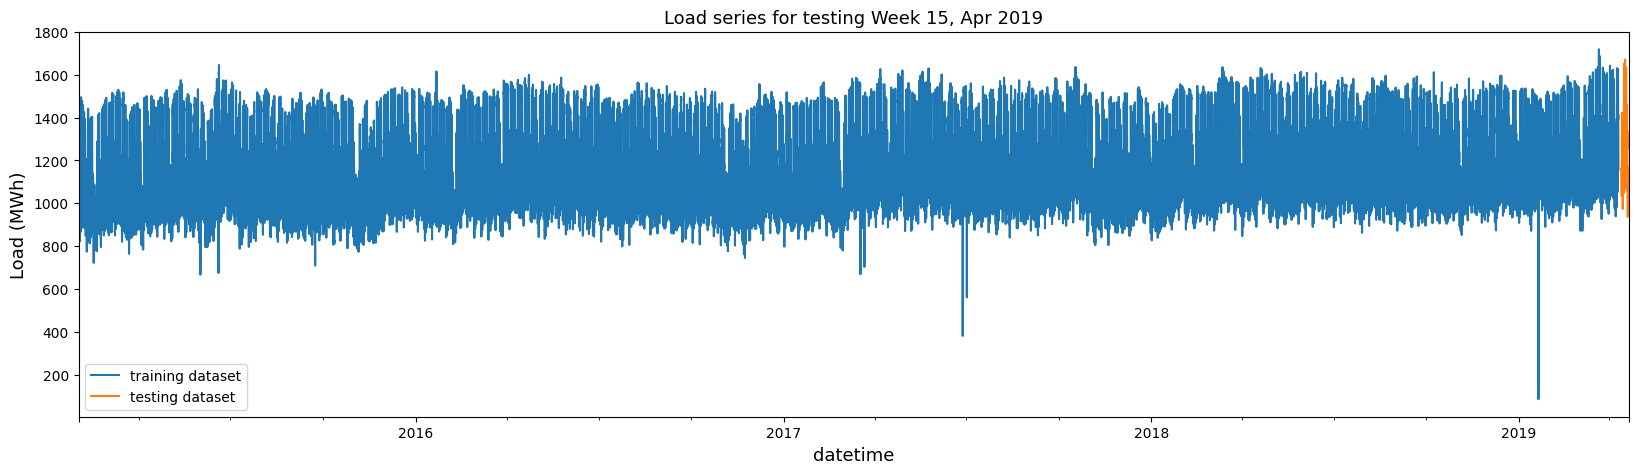

In [7]:
#Plotting training/testing pair's electricity load 
train_dict[keys[0]]['DEMAND'].plot(figsize=(20,5), label='training dataset')
test_dict[keys[0]]['DEMAND'].plot(figsize=(20,5), label='testing dataset')
plt.xlabel('datetime', fontsize = 13)
plt.ylabel('Load (MWh)', fontsize=13)
plt.title('Load series for testing ' + keys[0],fontsize=13)
plt.legend()

In [8]:
type(train_dict[keys[0]])

pandas.core.frame.DataFrame

In [9]:
train1 = train_dict[keys[0]]

In [10]:
train1.columns

Index(['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek', 'weekend',
       'holiday', 'Holiday_ID', 'hourOfDay', 'T2M_toc', 'DEMAND'],
      dtype='object')

In [11]:
train1

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955


In [12]:
# from IPython import display
# from matplotlib.patches import Patch
# legend_elements = [Patch(facecolor='#5D666D', label='Training weeks'),
#                    Patch(facecolor='#BFD630', label='Testing weeks')]
# fig, ax = plt.subplots(figsize=(20,1))
# ax.legend(handles=legend_elements, loc='center')
# plt.axis('off')
# plt.show()
# # Display gif
# display.Image(r'Animated_3D_plot.gif')

Text(0, 0.5, 'Electricity Demand')

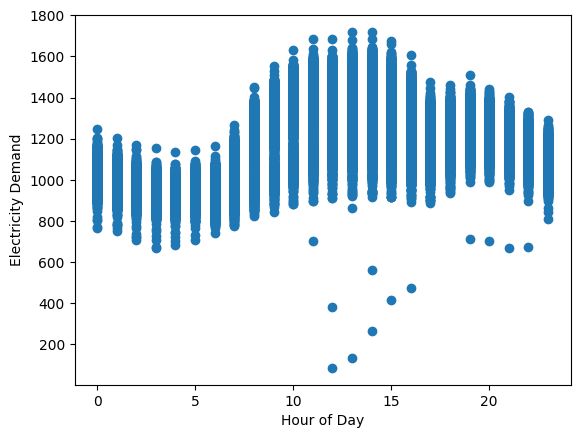

In [13]:
plt.scatter(train1['hourOfDay'], train1['DEMAND'])
plt.xlabel('Hour of Day')
plt.ylabel('Electricity Demand')

Text(0, 0.5, 'Holiday (1=holiday, 0=regular day)')

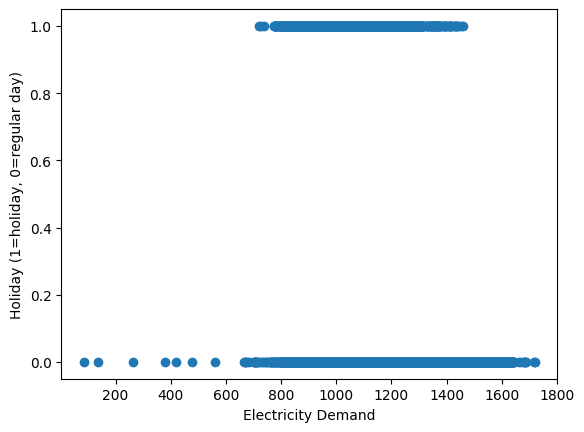

In [14]:
plt.scatter(train1['DEMAND'],train1['holiday'])
plt.xlabel('Electricity Demand')
plt.ylabel('Holiday (1=holiday, 0=regular day)')

In [15]:
print(train1['hourOfDay'].mean())

11.5


In [16]:
def groupby_plot(dataset,col):
    new_df=  dataset.groupby(col).mean()
    return plt.plot(new_df.index, new_df['DEMAND'])
def groupby_scatter(dataset,col):
    new_df=  dataset.groupby(col).mean()
    return plt.scatter(new_df.index, new_df['DEMAND'])

Text(0, 0.5, 'Electricity Demand (MWh)')

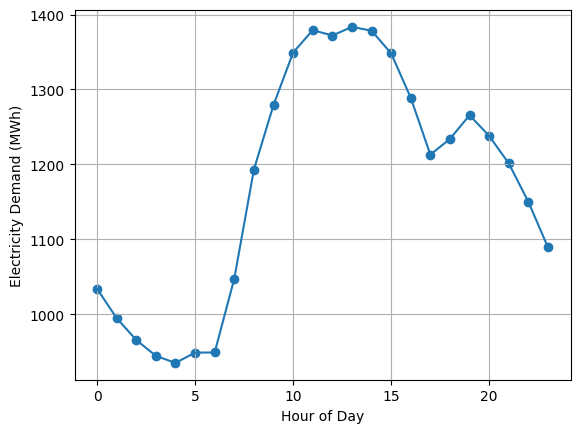

In [17]:
# train2 = 
groupby_plot(train1, 'hourOfDay')
groupby_scatter(train1, 'hourOfDay')
plt.xlabel('Hour of Day')
plt.grid('visible')
plt.ylabel('Electricity Demand (MWh)')
# plt.style.use('bmh')

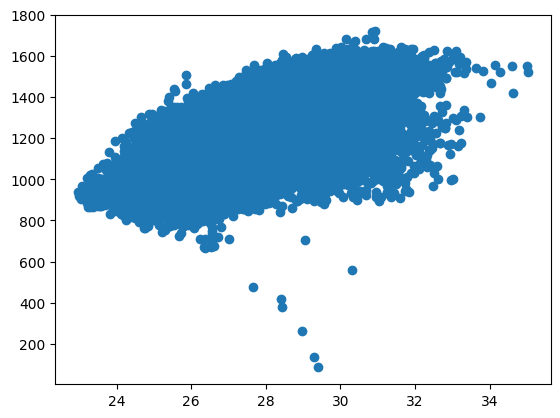

In [18]:
groupby_scatter(train1,'T2M_toc')

<AxesSubplot: xlabel='hourOfDay', ylabel='DEMAND'>

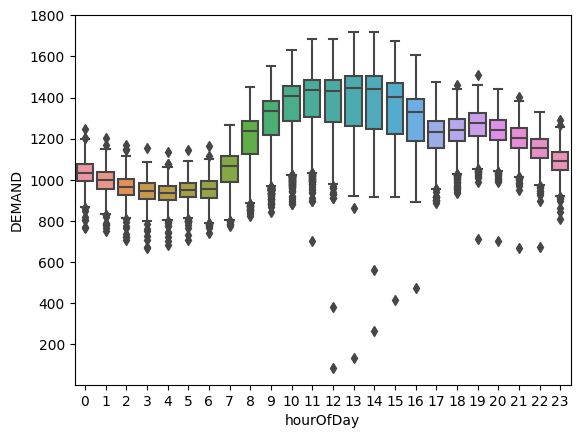

In [19]:
import seaborn as sns
sns.boxplot(x=train1['hourOfDay'],y = train1['DEMAND'])

In [36]:
train_covid = train_dict[keys[-1]]
train_not = train_dict[keys[7]]

<AxesSubplot: xlabel='hourOfDay', ylabel='DEMAND'>

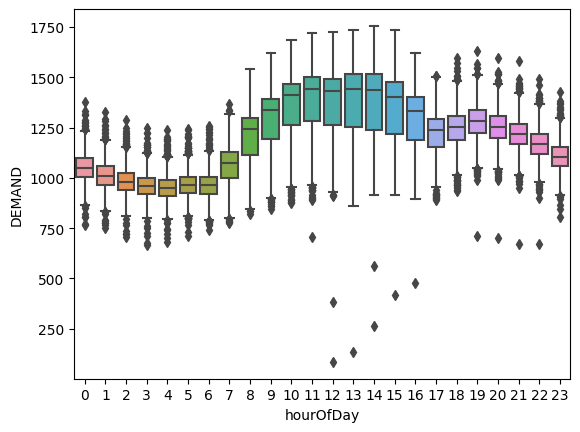

In [37]:
sns.boxplot(x=train_covid['hourOfDay'],y = train_covid['DEMAND'])

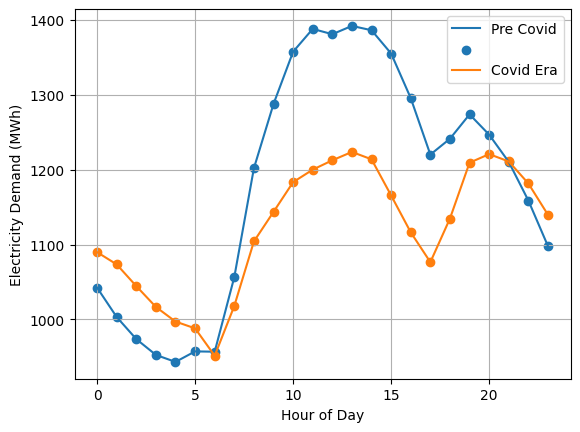

In [48]:
groupby_plot(train_not, 'hourOfDay')
groupby_scatter(train_not, 'hourOfDay')
groupby_plot(train_covid[-100:], 'hourOfDay')
groupby_scatter(train_covid[-100:], 'hourOfDay')
plt.xlabel('Hour of Day')
plt.grid('visible')
plt.ylabel('Electricity Demand (MWh)')
plt.legend(['Pre Covid','','Covid Era'])